1) Carga de librerias necesarias

In [34]:
# Manipulación de Datos
import numpy as np
import pandas as pd

# Preprocesamiento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# Modelado y Machine Learning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

# Reducción de Dimensionalidad
import umap.umap_ as umap

# Validación y Selección de Modelos
from sklearn.model_selection import (GroupKFold, GridSearchCV, KFold, RandomizedSearchCV,
                                     cross_val_score, train_test_split)

# Estadísticas y Optimización de Hiperparámetros
from scipy.stats import randint

# Métricas de Evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, make_scorer

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch para Redes Neuronales
import torch
import torch.nn as nn
import torch.optim as optim

# Utilidades de Python
import gc

2) Carga de bases de datos

In [35]:
#Se guarda en variables los datos de los archivos csv
client_train = pd.read_csv('client_train.csv')
invoice_train = pd.read_csv('invoice_train.csv')

C:\Users\luiso\AppData\Local\Temp\ipykernel_7000\1930133614.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_train = pd.read_csv('invoice_train.csv')


In [36]:
# Total de datos
print(client_train.shape)
print(invoice_train.shape)

(135493, 6)
(4476749, 16)


3) Verificar Unicidad de client_id en bases de datos:

In [37]:
#En la base de datos client_train se cuenta el número de veces que se repite el id de un cliente
client_counts = client_train['client_id'].value_counts()
print(client_counts.head())

client_id
train_Client_0        1
train_Client_59347    1
train_Client_5936     1
train_Client_59359    1
train_Client_59358    1
Name: count, dtype: int64


In [38]:
#En la base de datos invoice_train se cuenta el número de veces que se repite el id de un cliente
invoice_counts = invoice_train['client_id'].value_counts()
print(invoice_counts.head())


client_id
train_Client_116878    439
train_Client_9263      380
train_Client_130245    327
train_Client_59131     317
train_Client_61728     310
Name: count, dtype: int64


4) Se contruye un historico de consumo

In [39]:
# Se convierte la variable 'invoice_date' a formato fecha 
invoice_train['invoice_date'] = pd.to_datetime(invoice_train['invoice_date'])

# Se ordena 'invoice_train' por 'client_id' y 'invoice_date'
invoice_train_sorted = invoice_train.sort_values(by=['client_id', 'invoice_date'])

# Se crea una variable que contiene el historico de facturación de cada cliente y los datos de la base de datos 'client_train'
historico_consumo = pd.merge(invoice_train_sorted, client_train, on='client_id', how='left')

5) Análisis Exploratorio de Datos (EDA)

In [40]:
# Total de datos
print(historico_consumo.shape)

(4476749, 21)


In [41]:
# Ajustar la opción de visualización para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Observar las primeras filas del DataFrame
historico_consumo.head(10)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,train_Client_0,2005-10-17,11,1335667,0,203,6,1,124,0,0,0,3685,3809,4,ELEC,60,11,101,31/12/1994,0.0
1,train_Client_0,2006-02-24,11,1335667,0,203,6,1,141,0,0,0,3809,3950,4,ELEC,60,11,101,31/12/1994,0.0
2,train_Client_0,2006-06-23,11,1335667,0,203,6,1,162,0,0,0,3950,4112,4,ELEC,60,11,101,31/12/1994,0.0
3,train_Client_0,2006-10-18,11,1335667,0,203,6,1,159,0,0,0,4112,4271,4,ELEC,60,11,101,31/12/1994,0.0
4,train_Client_0,2007-02-26,11,1335667,0,203,6,1,182,0,0,0,4271,4453,4,ELEC,60,11,101,31/12/1994,0.0
5,train_Client_0,2007-06-27,11,1335667,0,203,6,1,240,0,0,0,4453,4693,4,ELEC,60,11,101,31/12/1994,0.0
6,train_Client_0,2007-10-25,11,1335667,0,203,6,1,276,0,0,0,4693,4969,4,ELEC,60,11,101,31/12/1994,0.0
7,train_Client_0,2008-01-04,11,1335667,0,203,6,1,277,0,0,0,4969,5246,4,ELEC,60,11,101,31/12/1994,0.0
8,train_Client_0,2008-07-28,11,1335667,0,203,6,1,171,0,0,0,5246,5417,4,ELEC,60,11,101,31/12/1994,0.0
9,train_Client_0,2008-11-25,11,1335667,0,203,6,1,174,0,0,0,5417,5591,4,ELEC,60,11,101,31/12/1994,0.0


In [42]:
# Se describe el historico de consumo
historico_consumo.describe()

,invoice_date,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,disrict,client_catg,region,target
count,4476749,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2013-03-18 07:42:34.444127232,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01,6.348246e+01,1.194381e+01,2.103584e+02,7.887688e-02
min,1977-06-09 00:00:00,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,1.100000e+01,1.010000e+02,0.000000e+00
25%,2010-01-19 00:00:00,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00,6.200000e+01,1.100000e+01,1.030000e+02,0.000000e+00
50%,2013-07-10 00:00:00,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00,6.200000e+01,1.100000e+01,3.010000e+02,0.000000e+00
75%,2016-09-03 00:00:00,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00,6.300000e+01,1.100000e+01,3.090000e+02,0.000000e+00
max,2019-12-07 00:00:00,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05,6.900000e+01,5.100000e+01,3.990000e+02,1.000000e+00
std,NaN,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03,3.273403e+00,6.022452e+00,1.035828e+02,2.695465e-01


In [43]:
# Se observa la distribución de las variables
historico_consumo.value_counts()

client_id            invoice_date  tarif_type  counter_number  counter_statue  counter_code  reading_remarque  counter_coefficient  consommation_level_1  consommation_level_2  consommation_level_3  consommation_level_4  old_index  new_index  months_number  counter_type  disrict  client_catg  region  creation_date  target
train_Client_66981   2006-07-17    11          132701          5               420           6                 1                    0                     0                     0                     0                     5946       5946       2              ELEC          63       51           313     20/11/1996     1.0       3
train_Client_3636    2012-01-18    40          312650          5               5             6                 1                    0                     0                     0                     0                     623        623        2              GAZ           60       11           101     21/11/1988     0.0       2
train_Client_7066    

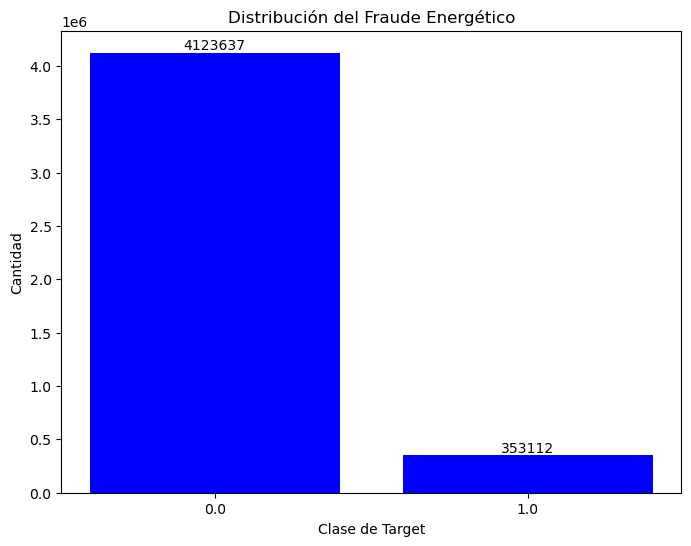

In [44]:
# Distribución de la variable 'target'
target_counts = historico_consumo['target'].value_counts()

# Creación del gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(target_counts.index.astype(str), target_counts.values, color='blue')
plt.title('Distribución del Fraude Energético')
plt.xlabel('Clase de Target')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X para mejor legibilidad

# Añadir etiquetas de recuento encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')

plt.show()

6) Feature Creation

In [45]:
# 1. Consumo Total por Factura
historico_consumo['consumo_total'] = historico_consumo[['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']].sum(axis=1)

# 2. Consumo Promedio Mensual
historico_consumo['consumo_promedio_mensual'] = historico_consumo.groupby('client_id')['consumo_total'].transform(lambda x: x.mean())

#3. Desviación Estándar del Consumo
historico_consumo['desviacion_std_consumo'] = historico_consumo.groupby('client_id')['consumo_total'].transform(lambda x: x.std())

#4. Variación de Consumo entre Facturas Consecutivas
historico_consumo = historico_consumo.sort_values(by=['client_id', 'invoice_date'])
historico_consumo['variacion_consumo'] = historico_consumo.groupby('client_id')['consumo_total'].diff()

#5. Ratio de Consumo entre Niveles
historico_consumo['ratio_level_1'] = historico_consumo['consommation_level_1'] / historico_consumo['consumo_total']
historico_consumo['ratio_level_2'] = historico_consumo['consommation_level_2'] / historico_consumo['consumo_total']
historico_consumo['ratio_level_3'] = historico_consumo['consommation_level_3'] / historico_consumo['consumo_total']
historico_consumo['ratio_level_4'] = historico_consumo['consommation_level_4'] / historico_consumo['consumo_total']

# 6. Días entre Facturas
historico_consumo['dias_entre_facturas'] = historico_consumo.groupby('client_id')['invoice_date'].diff().dt.days

# Se observan los cambios
historico_consumo.head(10)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target,consumo_total,consumo_promedio_mensual,desviacion_std_consumo,variacion_consumo,ratio_level_1,ratio_level_2,ratio_level_3,ratio_level_4,dias_entre_facturas
0,train_Client_0,2005-10-17,11,1335667,0,203,6,1,124,0,0,0,3685,3809,4,ELEC,60,11,101,31/12/1994,0.0,124,362.971429,341.55393,NaN,1.0,0.0,0.0,0.0,NaN
1,train_Client_0,2006-02-24,11,1335667,0,203,6,1,141,0,0,0,3809,3950,4,ELEC,60,11,101,31/12/1994,0.0,141,362.971429,341.55393,17.0,1.0,0.0,0.0,0.0,130.0
2,train_Client_0,2006-06-23,11,1335667,0,203,6,1,162,0,0,0,3950,4112,4,ELEC,60,11,101,31/12/1994,0.0,162,362.971429,341.55393,21.0,1.0,0.0,0.0,0.0,119.0
3,train_Client_0,2006-10-18,11,1335667,0,203,6,1,159,0,0,0,4112,4271,4,ELEC,60,11,101,31/12/1994,0.0,159,362.971429,341.55393,-3.0,1.0,0.0,0.0,0.0,117.0
4,train_Client_0,2007-02-26,11,1335667,0,203,6,1,182,0,0,0,4271,4453,4,ELEC,60,11,101,31/12/1994,0.0,182,362.971429,341.55393,23.0,1.0,0.0,0.0,0.0,131.0
5,train_Client_0,2007-06-27,11,1335667,0,203,6,1,240,0,0,0,4453,4693,4,ELEC,60,11,101,31/12/1994,0.0,240,362.971429,341.55393,58.0,1.0,0.0,0.0,0.0,121.0
6,train_Client_0,2007-10-25,11,1335667,0,203,6,1,276,0,0,0,4693,4969,4,ELEC,60,11,101,31/12/1994,0.0,276,362.971429,341.55393,36.0,1.0,0.0,0.0,0.0,120.0
7,train_Client_0,2008-01-04,11,1335667,0,203,6,1,277,0,0,0,4969,5246,4,ELEC,60,11,101,31/12/1994,0.0,277,362.971429,341.55393,1.0,1.0,0.0,0.0,0.0,71.0
8,train_Client_0,2008-07-28,11,1335667,0,203,6,1,171,0,0,0,5246,5417,4,ELEC,60,11,101,31/12/1994,0.0,171,362.971429,341.55393,-106.0,1.0,0.0,0.0,0.0,206.0
9,train_Client_0,2008-11-25,11,1335667,0,203,6,1,174,0,0,0,5417,5591,4,ELEC,60,11,101,31/12/1994,0.0,174,362.971429,341.55393,3.0,1.0,0.0,0.0,0.0,120.0


7. Feature Engeniering

In [46]:
# Se remplazan los valores NaN por 0 en columnas específicas
historico_consumo['dias_entre_facturas'].fillna(0, inplace=True)
historico_consumo['variacion_consumo'].fillna(0, inplace=True)

# Se eliminan las columnas que no se utilizarán
historico_consumo = historico_consumo.drop(['invoice_date', 'creation_date'], axis=1)

# Se inicializa  el codificador de etiquetas para 'client_id' y cambiar el nombre a 'client_id_encoded'
label_encoder = LabelEncoder()
historico_consumo['client_id_encoded'] = label_encoder.fit_transform(historico_consumo['client_id'].astype(str))
historico_consumo.drop('client_id', axis=1, inplace=True)

# Lista de columnas categóricas para convertir a formato numérico mediante Label Encoding
columns_to_encode = ['tarif_type', 'counter_statue', 'counter_code', 'reading_remarque', 'client_catg', 'region', 'counter_type']

# Convertir todas las columnas categóricas a tipo 'str' para garantizar la uniformidad
historico_consumo[columns_to_encode] = historico_consumo[columns_to_encode].astype(str)

# Aplicar LabelEncoder a cada columna categórica
for column in columns_to_encode:
    historico_consumo[column] = label_encoder.fit_transform(historico_consumo[column])

# Renombrar el DataFrame después de la codificación
historico_consumo_encoded = historico_consumo

# Verificar el resultado
print(historico_consumo_encoded.head(10))



C:\Users\luiso\AppData\Local\Temp\ipykernel_7000\2391347930.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  historico_consumo['dias_entre_facturas'].fillna(0, inplace=True)
C:\Users\luiso\AppData\Local\Temp\ipykernel_7000\2391347930.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

   tarif_type  counter_number  counter_statue  counter_code  reading_remarque  \
0           1         1335667               0             8                 4   
1           1         1335667               0             8                 4   
2           1         1335667               0             8                 4   
3           1         1335667               0             8                 4   
4           1         1335667               0             8                 4   
5           1         1335667               0             8                 4   
6           1         1335667               0             8                 4   
7           1         1335667               0             8                 4   
8           1         1335667               0             8                 4   
9           1         1335667               0             8                 4   

   counter_coefficient  consommation_level_1  consommation_level_2  \
0                    1                

In [47]:
# Se observan los cambios
print(historico_consumo_encoded.shape)
with pd.option_context('display.max_rows', None):
    print(historico_consumo_encoded.dtypes)


(4476749, 28)
tarif_type                    int32
counter_number                int64
counter_statue                int32
counter_code                  int32
reading_remarque              int32
counter_coefficient           int64
consommation_level_1          int64
consommation_level_2          int64
consommation_level_3          int64
consommation_level_4          int64
old_index                     int64
new_index                     int64
months_number                 int64
counter_type                  int32
disrict                       int64
client_catg                   int32
region                        int32
target                      float64
consumo_total                 int64
consumo_promedio_mensual    float64
desviacion_std_consumo      float64
variacion_consumo           float64
ratio_level_1               float64
ratio_level_2               float64
ratio_level_3               float64
ratio_level_4               float64
dias_entre_facturas         float64
client_id_enco

7.1 Se imputan datos para eliminar missing values

In [48]:
# Crear un objeto imputador con la estrategia de reemplazo por la mediana
imputer = SimpleImputer(strategy='median')

# Aplicar la imputación al DataFrame
columns_to_impute = historico_consumo_encoded.select_dtypes(include=['int64', 'float64']).columns
historico_consumo_encoded[columns_to_impute] = imputer.fit_transform(historico_consumo_encoded[columns_to_impute])

# Se verifica si aún quedan valores NaN
with pd.option_context('display.max_rows', None):
    print(historico_consumo_encoded.isnull().sum())

tarif_type                  0
counter_number              0
counter_statue              0
counter_code                0
reading_remarque            0
counter_coefficient         0
consommation_level_1        0
consommation_level_2        0
consommation_level_3        0
consommation_level_4        0
old_index                   0
new_index                   0
months_number               0
counter_type                0
disrict                     0
client_catg                 0
region                      0
target                      0
consumo_total               0
consumo_promedio_mensual    0
desviacion_std_consumo      0
variacion_consumo           0
ratio_level_1               0
ratio_level_2               0
ratio_level_3               0
ratio_level_4               0
dias_entre_facturas         0
client_id_encoded           0
dtype: int64


8. Árbol de Decisión

In [49]:
# Validacion cruzada con agrupación (Para evitar fuga de información)
groups = historico_consumo_encoded['client_id_encoded'].values
X = historico_consumo_encoded.drop(['target', 'client_id_encoded'], axis=1).values
y = historico_consumo_encoded['target'].values

gkf = GroupKFold(n_splits=5)

for train_idx, test_idx in gkf.split(X, y, groups):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]


Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9245042994407767
Precision: 0.7798042704626335
Recall: 0.05000641839369001


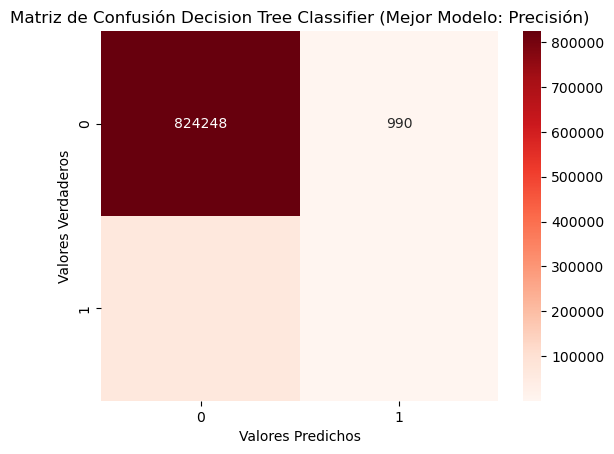

In [50]:
# Se definen los hiperparámetros de la búsqueda
param_grid = {
    'criterion': ['gini', 'entropy'],  # Función para medir el grado de impureza de un nodo
    'max_depth': [10, 20, 30],  # Profundidades limitadas para evitar el sobreajuste y reducir el tiempo de cálculo
    'min_samples_split': [2, 4],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Inicializar el clasificador
clf = DecisionTreeClassifier(random_state=42)

# Configurar la búsqueda de parámetros con validación cruzada
gkf = GroupKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid, cv=gkf, scoring='precision', n_jobs=-1)

# Preparar los grupos para la validación cruzada
groups = historico_consumo_encoded['client_id_encoded'].values

# Ejecutar la búsqueda de parámetros
grid_search.fit(X, y, groups=groups)

# Mejor modelo encontrado
best_clf = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
y_pred = best_clf.predict(X_test)

# Calcular las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Se obtienen los mejores parámetros
mejores_parametros = grid_search.best_params_
print("Mejores parámetros:", mejores_parametros)

# Imprimir los resultados del rendimiento
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Generar y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión Decision Tree Classifier (Mejor Modelo: Precisión)')
plt.show()

#Mejores parámetros sin niveles de consumo: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
#Accuracy: 0.9245031825578629
#Precision: 0.7796308650211252
#Recall: 0.05000641839369001

In [51]:
# Se eliminan las variables cargadas en memoria que no se utilizarán para continuar con el analisis de datos
del clf, gkf, grid_search, X, y, X_test, y_test, y_pred, conf_matrix

# Se invoca el recolector de basura
gc.collect()


5261

9. Balanceo del dataset mediante Undersampling con NearMiss

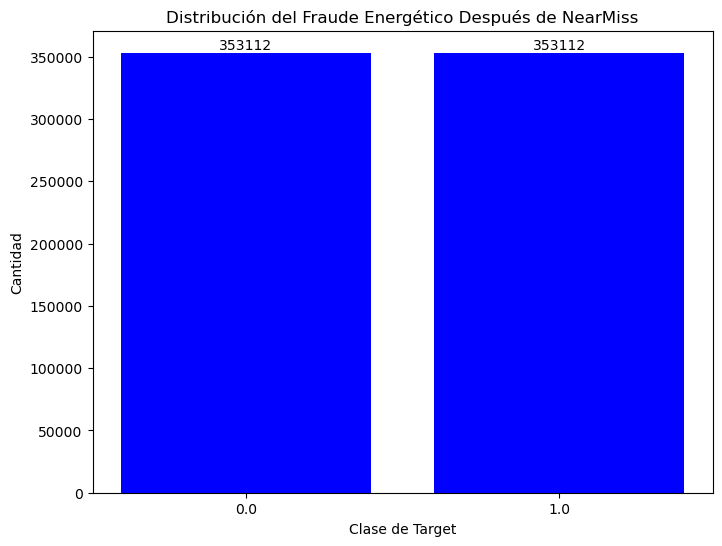

In [52]:
X = historico_consumo_encoded.drop(['target'], axis=1)
y = historico_consumo_encoded['target']

# Inicializar el objeto de undersampling con NearMiss
undersampler = NearMiss()

# Aplicar undersampling a tus datos
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Conteo de la variable 'target' después del undersampling
target_counts = y_resampled.value_counts()

# Creación del gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(target_counts.index.astype(str), target_counts.values, color='blue')
plt.title('Distribución del Fraude Energético Después de NearMiss')
plt.xlabel('Clase de Target')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X para mejor legibilidad

# Añadir etiquetas de recuento encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')

plt.show()



10. Reduccion de dimensionalidad

c:\Users\luiso\anaconda3\envs\fraud-detection-environment\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Número original de características: 27
Número reducido de características: 2


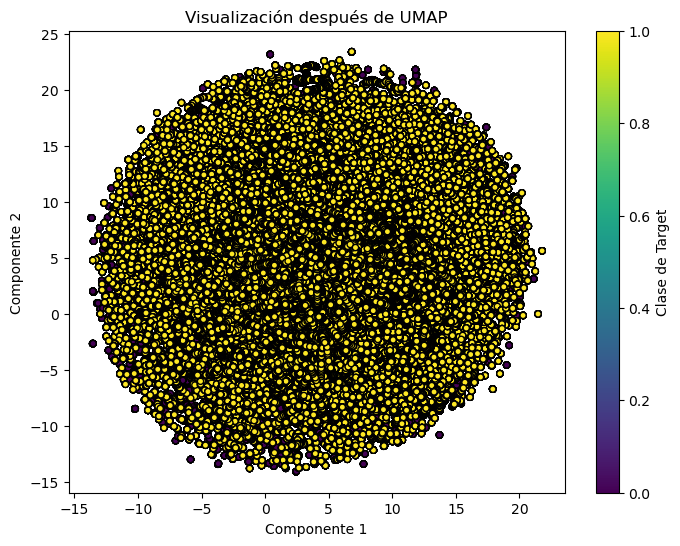

In [53]:
# Aplicar UMAP para reducir la dimensionalidad
reducer = umap.UMAP(random_state=42)
X_resampled_umap = reducer.fit_transform(X_resampled)

# Mostrar el resultado de la reducción de dimensionalidad
print(f'Número original de características: {X_resampled.shape[1]}')
print(f'Número reducido de características: {X_resampled_umap.shape[1]}')

# Visualizar las dos primeras componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_umap[:, 0], X_resampled_umap[:, 1], c=y_resampled, cmap='viridis', edgecolor='k', s=20)
plt.title('Visualización después de UMAP')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Clase de Target')
plt.show()


11. Estandarización de datos

c:\Users\luiso\anaconda3\envs\fraud-detection-environment\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


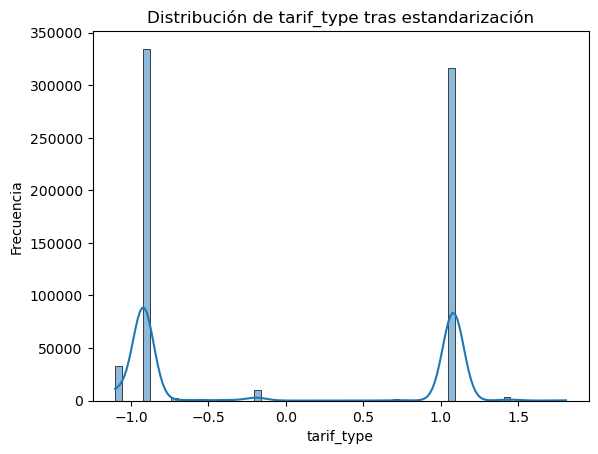

In [54]:
# Convertir tipos de datos para optimizar el uso de memoria
X_optimizado = X_resampled.astype({col: 'float32' for col in X_resampled.select_dtypes(include=['float64']).columns})
X_optimizado = X_optimizado.astype({col: 'int32' for col in X_optimizado.select_dtypes(include=['int64']).columns})

# Inicializar el objeto StandardScaler para estandarizar los datos
scaler = StandardScaler()

# Identificar las columnas numéricas en X_optimizado para la estandarización
columnas_numericas = X_optimizado.select_dtypes(include=['float32', 'int32']).columns

# Estandarizar las columnas numéricas de X_optimizado
X_optimizado[columnas_numericas] = scaler.fit_transform(X_optimizado[columnas_numericas])

# Seleccionar una columna para visualizar su distribución después de la estandarización
columna_visualizar = columnas_numericas[0]

# Generar un histograma para la columna seleccionada
sns.histplot(X_optimizado[columna_visualizar], kde=True)
plt.title(f'Distribución de {columna_visualizar} tras estandarización')
plt.xlabel(columna_visualizar)
plt.ylabel('Frecuencia')
plt.show()


12. Guardado de nueva base de datos

In [55]:
#Se guarda la base de datos generada 
# Primero, convierte 'y_resampled' de nuevo a un DataFrame para poder concatenarlo con X_optimizado
y_resampled_df = pd.DataFrame(y_resampled, columns=['target'])

# Concatena las características y las etiquetas en un nuevo DataFrame
datos_finales = pd.concat([X_optimizado, y_resampled_df], axis=1)

# Especifica el nombre del archivo donde deseas guardar la nueva base de datos
nombre_archivo = 'historico_consumo_undersampling_reduccionDimensionalidad_estandarizado.csv'

# Guarda el DataFrame como un archivo CSV
datos_finales.to_csv(nombre_archivo, index=False)

print(f'Datos guardados como {nombre_archivo}')


Datos guardados como historico_consumo_undersampling_reduccionDimensionalidad_estandarizado.csv


In [56]:
# Se carga la base de datos
historico_consumo_editado = pd.read_csv('historico_consumo_undersampling_reduccionDimensionalidad_estandarizado.csv')
historico_consumo_editado.head()

,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,consumo_total,consumo_promedio_mensual,desviacion_std_consumo,variacion_consumo,ratio_level_1,ratio_level_2,ratio_level_3,ratio_level_4,dias_entre_facturas,client_id_encoded,target
0,-0.920281,0.478864,-0.119347,0.469921,-0.903532,-0.00456,-0.606019,-0.131732,-0.119186,-0.076697,-0.365368,-0.372601,-0.012764,-0.910486,1.617247,5.231352,-0.981235,-0.397678,6.169007,12.114720,0.050922,0.300109,-0.267446,-0.169316,-0.132482,-0.792935,-1.740776,0.0
1,-0.920281,0.478864,-0.119347,0.469921,1.320737,-0.00456,-0.214081,0.042635,1.175976,1.442163,1.114339,1.124594,-0.015056,-0.910486,1.617247,5.231352,-0.981235,0.912741,6.169007,12.114720,0.167276,-4.504746,0.237158,2.863879,7.773209,-0.783417,-1.740776,0.0
2,-0.920281,0.478864,-0.119347,0.469921,1.320737,-0.00456,-0.214081,0.042635,1.175976,1.173230,1.157400,1.161943,-0.015056,-0.910486,1.617247,5.231352,-0.981235,0.758368,6.169007,12.114720,-0.090308,-4.405578,0.304540,3.268918,7.242178,-0.516915,-1.740776,0.0
3,-0.920281,0.478864,-0.119347,0.469921,1.320737,-0.00456,-0.214081,0.042635,1.175976,1.833338,0.859579,0.881366,-0.015056,-0.910486,1.617247,5.231352,-0.981235,1.137284,6.169007,12.114720,0.171289,-4.613383,0.163342,2.420166,8.354945,-0.783417,-1.740776,0.0
4,-0.920281,0.478002,-0.119347,-0.965950,1.320737,-0.00456,-0.604059,-0.131732,-0.119186,-0.076697,-0.364417,-0.371637,-0.014292,-0.910486,-1.197179,-0.208357,-1.254200,-0.396800,-0.563940,-0.518856,0.050922,0.300109,-0.267446,-0.169316,-0.132482,-0.792935,-1.738852,0.0


In [57]:
# Preparar las variables independientes (X) y dependiente (y)
X = historico_consumo_editado.drop('target', axis=1)  # Asumiendo que 'target' es el nombre de tu variable objetivo
y = historico_consumo_editado['target']

13.1 Regresion Logistica

In [58]:
# Definición del espacio de parámetros para la Regresión Logística
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Tipos de penalización
    'C': [0.01, 0.1, 1, 10],  # Inverso de la fuerza de regularización
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algoritmos de optimización
    'max_iter': [100, 200, 300]  # Número máximo de iteraciones
}

# Inicialización del modelo de Regresión Logística
clf_lr = LogisticRegression(random_state=42)

# Configuración de GridSearchCV
grid_search_lr = GridSearchCV(clf_lr, param_grid_lr, cv=5, scoring='precision', n_jobs=-1, verbose=1)

# Ejecución de la búsqueda de parámetros
grid_search_lr.fit(X_train, y_train)  # Asegúrate de tener definido X_train y y_train

# Modelo con los mejores parámetros encontrados
best_clf_lr = grid_search_lr.best_estimator_

# Realización de predicciones con el mejor modelo
y_pred_lr = best_clf_lr.predict(X_test)  # Asegúrate de tener definido X_test

# Cálculo de las métricas de rendimiento
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

# Impresión de los resultados de rendimiento
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')

# Obtención y muestra de la matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión Regresión Logística')
plt.show()

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


13.2 Árbol de Decisión

In [ ]:
# Definición del espacio de parámetros para el Árbol de Decisión
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Función para medir la calidad de una división
    'max_depth': [10, 20, 30, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 4, 6],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 3]  # Número mínimo de muestras requeridas para ser un nodo hoja
}

# Inicialización del modelo de Árbol de Decisión
clf_dt = DecisionTreeClassifier(random_state=42)

# Configuración de GridSearchCV para el Árbol de Decisión
grid_search_dt = GridSearchCV(clf_dt, param_grid_dt, cv=5, scoring='precision', n_jobs=-1, verbose=1)

# Ejecución de la búsqueda de parámetros
grid_search_dt.fit(X_train, y_train)  # Asegúrate de tener definido X_train y y_train

# Modelo con los mejores parámetros encontrados
best_clf_dt = grid_search_dt.best_estimator_

# Realización de predicciones con el mejor modelo
y_pred_dt = best_clf_dt.predict(X_test)  # Asegúrate de tener definido X_test

# Cálculo de las métricas de rendimiento
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

# Impresión de los resultados de rendimiento
print(f'Accuracy: {accuracy_dt}')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')

# Obtención y muestra de la matriz de confusión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión Árbol de Decisión (Mejor Modelo: Precisión)')
plt.show()

13.3 Support Vector Machine (SVM)

In [ ]:
# Definición del espacio de parámetros para SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Inverso de la fuerza de regularización
    'gamma': ['scale', 'auto'],  # Coeficiente de kernel para 'rbf', 'poly' y 'sigmoid'
    'kernel': ['rbf', 'poly', 'sigmoid']  # Tipo de kernel a utilizar en el algoritmo
}

# Inicialización del modelo SVM
clf_svm = SVC(random_state=42)

# Configuración de GridSearchCV para SVM
grid_search_svm = GridSearchCV(clf_svm, param_grid_svm, cv=5, scoring='precision', n_jobs=-1, verbose=1)

# Ejecución de la búsqueda de parámetros
grid_search_svm.fit(X_train, y_train)

# Modelo con los mejores parámetros encontrados
best_clf_svm = grid_search_svm.best_estimator_

# Realización de predicciones con el mejor modelo
y_pred_svm = best_clf_svm.predict(X_test)

# Cálculo de las métricas de rendimiento
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

# Impresión de los resultados de rendimiento
print(f'Accuracy: {accuracy_svm}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')

# Obtención y muestra de la matriz de confusión
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión SVM (Mejor Modelo: Precisión)')
plt.show()

13.4 Red Neuronal

In [ ]:
# Se asegura de que PyTorch esté utilizando la GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convertir las variables independientes y dependiente a tensores de PyTorch
X_tensor = torch.tensor(X.values, dtype=torch.float).to(device)
y_tensor = torch.tensor(y.values, dtype=torch.long).to(device)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Crear DataLoaders para los conjuntos de entrenamiento y prueba
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Definición de la red neuronal
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Inicialización del modelo
input_size = X_train_tensor.shape[1]
hidden_size = 64  # Este valor se puede ajustar
num_classes = len(torch.unique(y_tensor))
model = SimpleNN(input_size, hidden_size, num_classes).to(device)

# Función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
num_epochs = 10  # Este valor se puede ajustar
for epoch in range(num_epochs):
    for i, (features, labels) in enumerate(train_loader):
        features = features.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        # Backward y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluación del modelo
model.eval()
y_pred_list = []
with torch.no_grad():
    for features, _ in test_loader:
        features = features.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        y_pred_list.append(predicted.cpu())

# Concatenar todas las predicciones
y_pred = torch.cat(y_pred_list)

# Evaluación del modelo para obtener probabilidades
model.eval()
prob_list = []
with torch.no_grad():
    for features in test_loader:
        features = features[0].to(device)  # Solo se necesitan las características, no las etiquetas
        outputs = model(features)
        probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Obtener la probabilidad de la clase 1 (fraude)
        prob_list.append(probabilities.cpu())

# Concatenar todas las probabilidades
probabilities = torch.cat(prob_list)

# Crear un DataFrame con las probabilidades
# Asumiendo que tienes una columna 'client_id' en 'historico_consumo_editado' que corresponde a tus datos de entrada
client_ids = historico_consumo_editado.iloc[X_test.index]['client_id']  # Asegúrate de que X_test tenga un atributo 'index'
probabilities_df = pd.DataFrame({'client_id': client_ids, 'fraud_probability': probabilities.numpy()})

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_tensor.cpu(), y_pred)

# Mostrar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión Red Neuronal (PyTorch con GPU)')
plt.show()


14. Resultado de red neuronal

In [ ]:
# Se visualiza y exporta el dataset con las probabilidades de fraude de la red neuronal
probabilities_df.head(10)
probabilities_df.to_csv('probabilidades_fraude_calculadas.csv', index=False)